Setup and Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Set paths 
preprocessed_dir = r"C:\Users\sidne\OneDrive\Desktop\Studies\sem 4.2\IS Project\Project\Preprocessed"

# Load preprocessed UNSW data
X = pd.read_csv(os.path.join(preprocessed_dir, "UNSW_X_dos.csv"))
y = pd.read_csv(os.path.join(preprocessed_dir, "UNSW_y_dos.csv"))['is_dos']

# Quick check
print(f"✅ Loaded {X.shape[0]:,} samples with {X.shape[1]} features")
print(f"DoS prevalence: {y.mean()*100:.2f}%")

✅ Loaded 2,360,407 samples with 33 features
DoS prevalence: 6.00%


Train - Test Split and Model Training

In [ ]:
# Split data (stratified to preserve DoS ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")

# Train Random Forest
print("\nTraining Random Forest classifier...")
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Critical for imbalanced data
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)
rf.fit(X_train, y_train)
print(" Training complete!")

Training set: 1,888,325 samples
Test set: 472,082 samples

Training Random Forest classifier...
✅ Training complete!


## Performance Evaluation

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    443753
         DoS       0.98      0.96      0.97     28329

    accuracy                           1.00    472082
   macro avg       0.99      0.98      0.98    472082
weighted avg       1.00      1.00      1.00    472082



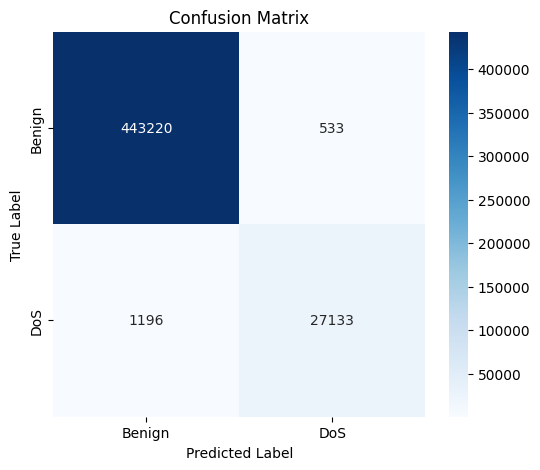

In [3]:
# Predict on test set
y_pred = rf.predict(X_test)

# Print classification report
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'DoS']))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'DoS'],
            yticklabels=['Benign', 'DoS'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Feature Importance

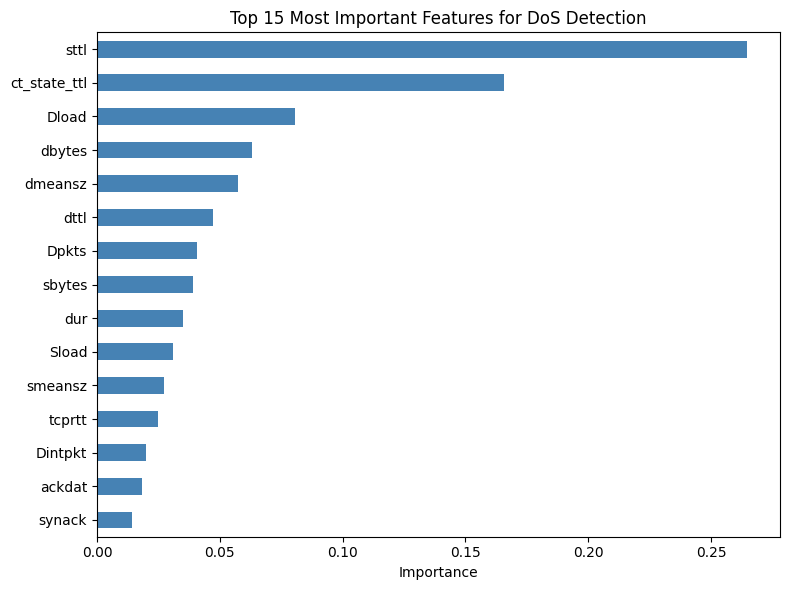

Top 15 Features:
sttl            0.264846
ct_state_ttl    0.165711
Dload           0.080703
dbytes          0.063110
dmeansz         0.057583
dttl            0.047377
Dpkts           0.040687
sbytes          0.039135
dur             0.034882
Sload           0.030808
smeansz         0.027438
tcprtt          0.024687
Dintpkt         0.019923
ackdat          0.018266
synack          0.014362
dtype: float64


In [4]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

# Plot top 15 features
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='steelblue')
plt.title('Top 15 Most Important Features for DoS Detection')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Most important on top
plt.tight_layout()
plt.show()

print("Top 15 Features:")
print(top_features)

Saving the model

In [ ]:
# Save trained model
model_path = os.path.join(preprocessed_dir, "rf_model_dos.joblib")
joblib.dump(rf, model_path)

print(f"Model saved successfully!")
print(f"Location: {model_path}")
print(f"File size: {os.path.getsize(model_path) / (1024*1024):.2f} MB")

Model saved successfully!
Location: C:\Users\sidne\OneDrive\Desktop\Studies\sem 4.2\IS Project\Project\Preprocessed\rf_unsw_dos.pkl
File size: 110.59 MB
